In [1]:
# NAMA : MUHAMMAD CHASKA PUTRA SOFYAN
# NPM  : 5220411398

# Analisis Teks Komentar YouTube - Perbandingan Dua Skenario
# Dataset: Komentar YouTube Berbahasa Indonesia

# ============================================================================
# INSTALASI DAN IMPORT LIBRARY
# ============================================================================

In [9]:
!pip install sastrawi

In [10]:
import pandas as pd
import numpy as np
import re


from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics import silhouette_score, davies_bouldin_score


import matplotlib.pyplot as plt
from wordcloud import WordCloud


# NLP Bahasa Indonesia
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory


In [12]:

df = pd.read_csv('youtube_comments.csv')

df

,author,comment
0,@ributandiastoto1516,"Over capacity ko masih impor, logikanya dimana..."
1,@hermance1838,Lanjutkan pak Purbaya kami rakyat Indonesia di...
2,@redz3y,BANGUN KILANG BARU: Menguntungkan bagi Indones...
3,@KDMtv-q4e,MANTAP PAK KOBOI PURBAYA❤ MENKEU RI🇮🇩
4,@noworries-g4b,"Pak prabowo tolong ganti mentri esdm, bahlil h..."
...,...,...
995,@bilgomesddm,saya heran sama pak Prabowo....kenapa menteri ...
996,@idsl6227,Pokoknya pak purbaya ini kalau ngomong selalu ...
997,@tommywisnu70,"Ya jelas lah penjahat lbh milih impor,, soale ..."
998,@radityajuliantosjsfs.1338,Sekian juta orang di indonesia kenapa bahlil s...


**TEXT PREPROCESSING**

In [15]:
def cleaning_text(text):
  text = text.lower()
  text = re.sub(r'[^a-z\s]', ' ', text)
  text = re.sub(r'\s+', ' ', text)
  return text


# Stopword removal dan stemming
stop_factory = StopWordRemoverFactory()
stopwords = stop_factory.get_stop_words()
stem_factory = StemmerFactory()
stemmer = stem_factory.create_stemmer()


def preprocess(text):
  text = cleaning_text(text)
  tokens = text.split()
  tokens = [t for t in tokens if t not in stopwords]
  text = ' '.join(tokens)
  text = stemmer.stem(text)
  return text


# Terapkan preprocessing
df['clean_text'] = df['comment'].apply(preprocess)
df.to_csv('youtube_comments_clean.csv', index=False)
df

,author,comment,clean_text
0,@ributandiastoto1516,"Over capacity ko masih impor, logikanya dimana...",over capacity ko impor logika salah satu mafia...
1,@hermance1838,Lanjutkan pak Purbaya kami rakyat Indonesia di...,lanjut pak purbaya rakyat indonesia kalimantan...
2,@redz3y,BANGUN KILANG BARU: Menguntungkan bagi Indones...,bangun kilang baru untung indonesia rugi mafia...
3,@KDMtv-q4e,MANTAP PAK KOBOI PURBAYA❤ MENKEU RI🇮🇩,mantap pak koboi purbaya menkeu ri
4,@noworries-g4b,"Pak prabowo tolong ganti mentri esdm, bahlil h...",pak prabowo ganti tri esdm bahlil gusur kompet...
...,...,...,...
995,@bilgomesddm,saya heran sama pak Prabowo....kenapa menteri ...,heran sama pak prabowo menteri bom ganti bahli...
996,@idsl6227,Pokoknya pak purbaya ini kalau ngomong selalu ...,pokok pak purbaya kalau ngomong selalu to the ...
997,@tommywisnu70,"Ya jelas lah penjahat lbh milih impor,, soale ...",jelas lah jahat lbh milih impor soale impor cu...
998,@radityajuliantosjsfs.1338,Sekian juta orang di indonesia kenapa bahlil s...,sekian juta orang indonesia bahlil si jadiin m...


**FEATURE EXTRACTION (TF-IDF)**

In [16]:
tfidf = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf.fit_transform(df['clean_text'])
print(X_tfidf)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 8145 stored elements and shape (1000, 1000)>
  Coords	Values
  (0, 681)	0.2570402420732255
  (0, 177)	0.28199115944522163
  (0, 458)	0.42276731991640626
  (0, 351)	0.22236644332857247
  (0, 511)	0.3241342286194544
  (0, 779)	0.364207548746384
  (0, 786)	0.3468383140298826
  (0, 525)	0.2549769975254421
  (0, 652)	0.4507904568300197
  (1, 493)	0.15249754020143924
  (1, 691)	0.0812852290651421
  (1, 759)	0.09418911598732424
  (1, 761)	0.10134392143636597
  (1, 356)	0.10551221570009321
  (1, 419)	0.17255623257266312
  (1, 236)	0.13689974899549479
  (1, 805)	0.14217587522516253
  (1, 81)	0.8111728379819318
  (1, 440)	0.34511246514532623
  (1, 43)	0.17701713373794253
  (1, 806)	0.18229325996761025
  (1, 812)	0.12516616614482728
  (1, 416)	0.11745031230662638
  (2, 525)	0.28736580467261824
  (2, 356)	0.5680060061757034
  :	:
  (997, 657)	0.15791012248392636
  (997, 10)	0.18478280388308893
  (997, 487)	0.22212646395082952
  (997, 37

**Clustering dengan KMeans**

In [17]:
jumlah_cluster = 2
kmeans = KMeans(n_clusters=jumlah_cluster, random_state=42)
cluster_label = kmeans.fit_predict(X_tfidf)

df['cluster_id'] = cluster_label
cluster_mean = (
    df.groupby('cluster_id')['comment']
    .apply(lambda x: x.str.len().mean())
)

sentimen_map = {
    cluster_mean.idxmax(): 'positif',
    cluster_mean.idxmin(): 'negatif'
}

df['sentimen'] = df['cluster_id'].map(sentimen_map)

print(df[['comment', 'sentimen']])
df.to_csv('05_hasil_clustering.csv', index=False)

                                               comment sentimen
0    Over capacity ko masih impor, logikanya dimana...  positif
1    Lanjutkan pak Purbaya kami rakyat Indonesia di...  positif
2    BANGUN KILANG BARU: Menguntungkan bagi Indones...  positif
3                MANTAP PAK KOBOI PURBAYA❤ MENKEU RI🇮🇩  positif
4    Pak prabowo tolong ganti mentri esdm, bahlil h...  positif
..                                                 ...      ...
995  saya heran sama pak Prabowo....kenapa menteri ...  positif
996  Pokoknya pak purbaya ini kalau ngomong selalu ...  positif
997  Ya jelas lah penjahat lbh milih impor,, soale ...  positif
998  Sekian juta orang di indonesia kenapa bahlil s...  positif
999            tersengat listrik kayanya ni pak bahlil  positif

[1000 rows x 2 columns]


**Evaluasi Clustering**

In [18]:
sil_score = silhouette_score(X_tfidf, cluster_label)
db_score = davies_bouldin_score(X_tfidf.toarray(), cluster_label)


print(f'Silhouette Score : {sil_score:.4f}')
print(f'Davies-Bouldin Index : {db_score:.4f}')

Silhouette Score : 0.0169
Davies-Bouldin Index : 2.9654


**Visualisasi WordCloud**

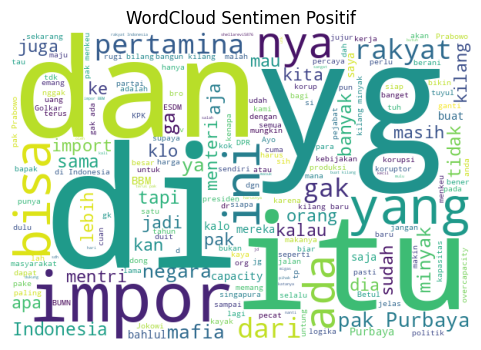

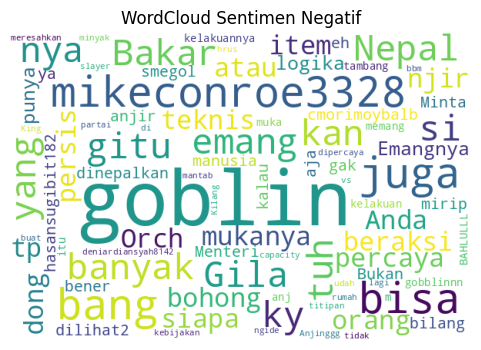

In [19]:
for label in ['positif', 'negatif']:
    # Ambil teks sesuai sentimen
    text_sentimen = ' '.join(df[df['sentimen'] == label]['comment'])

    # Hapus keyword "bahlil"
    text_sentimen = re.sub(r'\bbahlil\b', '', text_sentimen, flags=re.IGNORECASE)

    wc = WordCloud(
        width=600,
        height=400,
        background_color='white'
    ).generate(text_sentimen)

    plt.figure(figsize=(6,4))
    plt.imshow(wc)
    plt.axis('off')
    plt.title(f'WordCloud Sentimen {label.capitalize()}')
    plt.show()

**Topic Modeling menggunakan LDA**

In [20]:
count_vectorizer = CountVectorizer(max_features=1000)
X_count = count_vectorizer.fit_transform(df['clean_text'])


jumlah_topik = 2
lda = LatentDirichletAllocation(n_components=jumlah_topik, random_state=42)
lda.fit(X_count)

LatentDirichletAllocation(n_components=2, random_state=42)

**Menampilkan Topik dan Kata Dominan**

In [21]:
feature_names = count_vectorizer.get_feature_names_out()


def display_topics(model, feature_names, n_top_words=5):
  for topic_idx, topic in enumerate(model.components_):
    print(f'Topik {topic_idx + 1}:')
    print([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
    print()


display_topics(lda, feature_names)

Topik 1:
['kilang', 'impor', 'minyak', 'over', 'bahlil']

Topik 2:
['pak', 'yg', 'purbaya', 'bahlil', 'rakyat']



**Visualisasi Distribusi Data Clustering**

In [23]:

topic_distribution = lda.transform(X_count)
df['dominant_topic'] = topic_distribution.argmax(axis=1)


print(df[['clean_text', 'dominant_topic']])


                                            clean_text  dominant_topic
0    over capacity ko impor logika salah satu mafia...               0
1    lanjut pak purbaya rakyat indonesia kalimantan...               1
2    bangun kilang baru untung indonesia rugi mafia...               0
3                   mantap pak koboi purbaya menkeu ri               1
4    pak prabowo ganti tri esdm bahlil gusur kompet...               1
..                                                 ...             ...
995  heran sama pak prabowo menteri bom ganti bahli...               1
996  pokok pak purbaya kalau ngomong selalu to the ...               1
997  jelas lah jahat lbh milih impor soale impor cu...               1
998  sekian juta orang indonesia bahlil si jadiin m...               1
999                  sengat listrik kaya ni pak bahlil               1

[1000 rows x 2 columns]


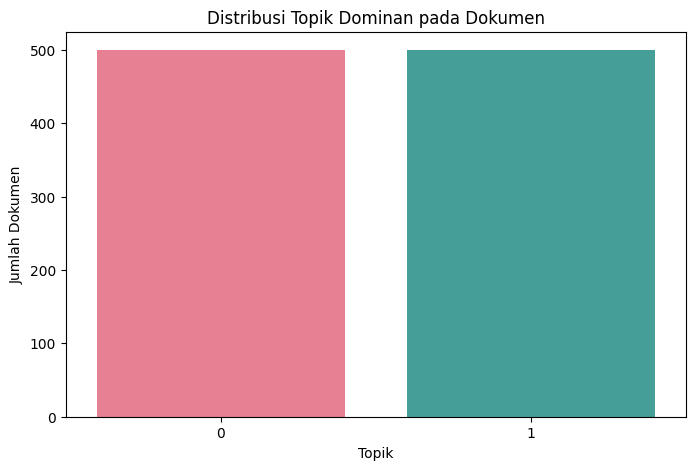

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(
    x='dominant_topic',
    data=df,
    palette='husl'
)

plt.title('Distribusi Topik Dominan pada Dokumen')
plt.xlabel('Topik')
plt.ylabel('Jumlah Dokumen')
plt.show()